In [37]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.font_manager as fm
import matplotlib as mpl

mpl.rc('font', family='Malgun Gothic')
mpl.rcParams['axes.unicode_minus'] = False

In [3]:
titanic = pd.read_csv("titanic_train.csv")

In [4]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
titanic = titanic.drop('Cabin', axis = 1)

In [9]:
titanic = titanic.drop(['Name', 'Ticket'], axis = 1)

In [10]:
titanic

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [11]:
titanic_survived = titanic[titanic['Survived'] == 1]

In [12]:
titanic_survived

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
8,9,1,3,female,27.0,0,2,11.1333,S
9,10,1,2,female,14.0,1,0,30.0708,C
...,...,...,...,...,...,...,...,...,...
875,876,1,3,female,15.0,0,0,7.2250,C
879,880,1,1,female,56.0,0,1,83.1583,C
880,881,1,2,female,25.0,0,1,26.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S


In [29]:
survived_rate = titanic.groupby('Sex')['Survived'].mean()

In [30]:
survived_rate

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

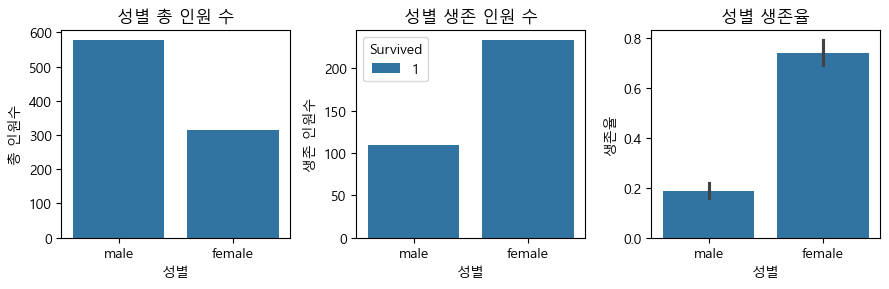

In [39]:
fig, ax = plt.subplots(nrows = 1, ncols= 3, figsize = (9,3))

sns.countplot(data=titanic, x='Sex', ax = ax[0])
sns.countplot(data=titanic_survived, x='Sex', hue='Survived',order = ['male' , 'female'], ax = ax[1])
sns.barplot(data=titanic, x='Sex', y='Survived', ax= ax[2])

ax[0].set_xlabel('성별')
ax[0].set_ylabel('총 인원수')
ax[1].set_xlabel('성별')
ax[1].set_ylabel('생존 인원수')
ax[2].set_xlabel('성별')
ax[2].set_ylabel('생존율')

ax[0].set_title('성별 총 인원 수')
ax[1].set_title('성별 생존 인원 수')
ax[2].set_title('성별 생존율')


plt.tight_layout()

성별 생존율

성별 총 인원 수는 남성이 여성에 비해 두배 정도 많은 수치를 가지고 있으나, 생존 인원 수를 보면 반대로 여성이 남성보다 두배 정도 많은 수치를 가지고 있음을 알 수 있고, 성별 생존율을 살펴 보았을 때 확연히 여성의 생존율이 남성의 생존율보다 많은 것을 알 수 있다. 우연의 일치로 남성보다 여성이 더 많이 생존했을 수 있으나 우연으로 치기에는 너무 많은 차이가 나므로 당시 타이타닉호에서 남성들보다 여성들이 우선적으로 구출되었다는 것을 알 수 있다.

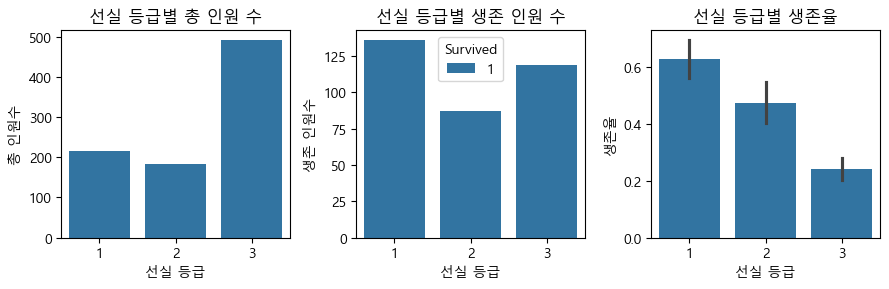

In [44]:
fig, ax = plt.subplots(nrows = 1, ncols= 3, figsize = (9,3))

sns.countplot(data=titanic, x='Pclass', ax = ax[0])
sns.countplot(data=titanic_survived, x='Pclass', hue='Survived', ax = ax[1])
sns.barplot(data=titanic, x='Pclass', y='Survived', ax = ax[2])

ax[0].set_xlabel('선실 등급')
ax[0].set_ylabel('총 인원수')
ax[1].set_xlabel('선실 등급')
ax[1].set_ylabel('생존 인원수')
ax[2].set_xlabel('선실 등급')
ax[2].set_ylabel('생존율')

ax[0].set_title('선실 등급별 총 인원 수')
ax[1].set_title('선실 등급별 생존 인원 수')
ax[2].set_title('선실 등급별 생존율')


plt.tight_layout()

선실 등급별 생존율

총 인원수 중 3등급실이 다른 두 선실을 합친 것보다 많지만 생존 인원 수를 보면 1등급실의 생존 수가 가장 많은 것을 알 수 있고, 생존율 또한 1등급, 2등급, 3등급 순으로 선실등급 순에 따라서 생존율이 낮아지는 것을 알 수 있다. 이를 통해 상대적으로 사회적 지위가 높거나 가격이 비싼 1등급실의 사람들이 우선적으로 구출되었다는 것을 알 수 있다.

그렇다면 구출될 수 있는 자리가 한자리밖에 없는데 3등급실 여자와 1등급실 남자가 있다면 어느 쪽이 먼저 구출될 수 있을까?

가정) 남녀 생존율 차이가 선실등급의 생존율 차이보다 크므로 여자가 더 우선시 되어 구출되었을 것이다.

In [45]:
grouped = titanic.groupby(['Pclass', 'Sex'])['Survived'].mean().reset_index()

In [46]:
grouped

,Pclass,Sex,Survived
0,1,female,0.968085
1,1,male,0.368852
2,2,female,0.921053
3,2,male,0.157407
4,3,female,0.500000
5,3,male,0.135447


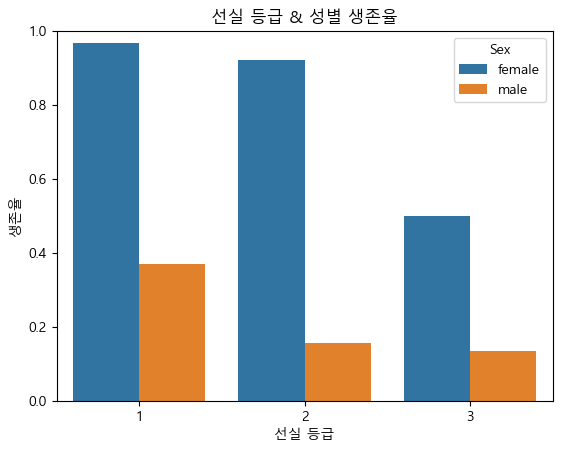

In [49]:
sns.barplot(data=grouped, x='Pclass', y='Survived', hue='Sex')
plt.ylim(0, 1)
plt.title('선실 등급 & 성별 생존율')
plt.ylabel('생존율')
plt.xlabel('선실 등급')
plt.show()

위 표를 보면 알 수 있는 것은 같은 선실등급이라도 여자가 훨씬 우선시 되어 구출이 되었고, 3등급실의 여성 생존율이 1등급실의 남성 생존율보다 크므로 선실등급에 따른 구출 우선순위가 성별에 따른 구출 우선순위보다 나중인 것을 알 수 있다. 이로인해 가정이 성립한다고 볼 수 있다.